<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#One-Hot-Encoding" data-toc-modified-id="One-Hot-Encoding-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>One-Hot Encoding</a></span><ul class="toc-item"><li><span><a href="#Exercise:-Compute-the-one-hot-matrix-for-a-single-input-column-X" data-toc-modified-id="Exercise:-Compute-the-one-hot-matrix-for-a-single-input-column-X-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Exercise: Compute the one-hot matrix for a single input column <code>X</code></a></span></li></ul></li><li><span><a href="#Linear-Feature-Combinations" data-toc-modified-id="Linear-Feature-Combinations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Linear Feature Combinations</a></span><ul class="toc-item"><li><span><a href="#Exercise:-Show-that-the-rank-of-the-matrix-cannot-exceed-the-original-rank-based-on-linear-projections" data-toc-modified-id="Exercise:-Show-that-the-rank-of-the-matrix-cannot-exceed-the-original-rank-based-on-linear-projections-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Exercise: Show that the rank of the matrix cannot exceed the original rank based on linear projections</a></span></li><li><span><a href="#PCA" data-toc-modified-id="PCA-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>PCA</a></span></li><li><span><a href="#Partial-Least-Squares-(PLS)" data-toc-modified-id="Partial-Least-Squares-(PLS)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Partial Least Squares (PLS)</a></span></li><li><span><a href="#Exercise:-Create-a-KRR-model-based-on-the-first-5-PLS-components" data-toc-modified-id="Exercise:-Create-a-KRR-model-based-on-the-first-5-PLS-components-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Exercise: Create a KRR model based on the first 5 PLS components</a></span></li><li><span><a href="#Linear-Discriminant-Analysis-(LDA)" data-toc-modified-id="Linear-Discriminant-Analysis-(LDA)-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Linear Discriminant Analysis (LDA)</a></span><ul class="toc-item"><li><span><a href="#Step-1:-Compute-class-centroids" data-toc-modified-id="Step-1:-Compute-class-centroids-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Step 1: Compute class centroids</a></span></li><li><span><a href="#Step-2:-Compute-the-intra-class-(within-class)-covariance" data-toc-modified-id="Step-2:-Compute-the-intra-class-(within-class)-covariance-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>Step 2: Compute the intra-class (within class) covariance</a></span></li><li><span><a href="#Step-3:-Compute-inter-class-covariance" data-toc-modified-id="Step-3:-Compute-inter-class-covariance-2.5.3"><span class="toc-item-num">2.5.3&nbsp;&nbsp;</span>Step 3: Compute inter-class covariance</a></span></li><li><span><a href="#Step-4:-Take-the-largest-eigenvalues/vectors-of-the-composite-covariance" data-toc-modified-id="Step-4:-Take-the-largest-eigenvalues/vectors-of-the-composite-covariance-2.5.4"><span class="toc-item-num">2.5.4&nbsp;&nbsp;</span>Step 4: Take the largest eigenvalues/vectors of the composite covariance</a></span></li><li><span><a href="#Step-5:-Find-the-perpendicular-vector-to-use-as-the-decision-boundary" data-toc-modified-id="Step-5:-Find-the-perpendicular-vector-to-use-as-the-decision-boundary-2.5.5"><span class="toc-item-num">2.5.5&nbsp;&nbsp;</span>Step 5: Find the perpendicular vector to use as the decision boundary</a></span></li><li><span><a href="#Application-to-MNIST" data-toc-modified-id="Application-to-MNIST-2.5.6"><span class="toc-item-num">2.5.6&nbsp;&nbsp;</span>Application to MNIST</a></span></li></ul></li><li><span><a href="#Exercise:-Compare-the-accuracy-of-LDA-model-for-perovskite-prediction-with-and-without-the-one-hot-encoding-features." data-toc-modified-id="Exercise:-Compare-the-accuracy-of-LDA-model-for-perovskite-prediction-with-and-without-the-one-hot-encoding-features.-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Exercise: Compare the accuracy of LDA model for perovskite prediction with and without the one-hot encoding features.</a></span></li></ul></li><li><span><a href="#Symbolic-Regression" data-toc-modified-id="Symbolic-Regression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Symbolic Regression</a></span><ul class="toc-item"><li><span><a href="#Exercise-(6745-Only):-Derive-a-formula-for-the-number-of-polynomial-features-as-a-function-of-number-of-original-features-and-polynomial-order." data-toc-modified-id="Exercise-(6745-Only):-Derive-a-formula-for-the-number-of-polynomial-features-as-a-function-of-number-of-original-features-and-polynomial-order.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Exercise (6745 Only): Derive a formula for the number of polynomial features as a function of number of original features and polynomial order.</a></span></li></ul></li></ul></div>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('../settings/plot_style.mplstyle')

In [2]:
import numpy as np
import pandas as pd
import warnings

warnings.simplefilter('ignore')

clrs = np.array(['#003057', '#EAAA00', '#4B8B9B', '#B3A369', '#377117', '#1879DB', '#8E8B76', '#F5D580', '#002233', '#808080'])

# Feature Transformations

The concept of feature engineering can mean many things, but one common scenario is that features which are already provided are transformed in various ways to improve the efficiency or performance of the model. We can think of this from the perspective of a general form of a machine-learning model:

$\vec{y} = f(\vec{x}, \vec{w}(\vec{\eta}))$

We have already seen how to find the optimal model parameters, $\vec{w}$, using multi-dimensional optimization of a loss function, and we have discussed how to determine the optimal hyperparameters, $\vec{\eta}$, using cross-validation and/or information criteria. In feature engineering, the goal is to modify $\vec{x}$ to improve the accuracy and/or efficiency of the model by identifying a new set of transformed features, $\vec{\chi}$. These feature transformations will use the original features as inputs, and often also depend on hyper-parameters, so we could think of the transformed features as being a function of both: $\vec{\chi}(\vec{x}, \vec{\eta})$, leading to a more complex model form:

$\vec{y} = f(\vec{\chi}(\vec{x}, \vec{\eta}), \vec{w}(\vec{\eta}))$

We will explore a few possibilities of what this function might be in this lecture:

* One-Hot Encoding
* Linear feature combinations
* Symbolic regression

However, there are numerous other possibilities. We will see some others in the course, but you may also wish to do independent research to get new ideas. Determining good features for a model is one of the most important strategies for designing a machine-learning model, but it often relies on significant knowledge or intuition about the problem at hand.

## One-Hot Encoding

One very common situation that is often encoutered in analytics is discrete variables. There are 2 types of discrete/integer features:

* categorical features: order does not matter (e.g. color = [red, blue, green])
* ordinal features: order does matter (e.g. count = [1, 2, 3])

For ordinal features it may make sense to convert integers to continuous variables, but in the case of categorical features this makes less sense. Even for ordinal features, it may be preferable to represent the data in a more discrete way. One common approach to this is to use "one hot encoding", where categorical variables are converted to vectors of 0's and 1's. For example:

* color = [red , blue, green] $\rightarrow$ color = [[1,0,0], [0,1,0], [0,0,1]

This vector has an interesting feature: The "distance" is 0 if the vector is the same, but 1 if it is not! This means that algorithms that compute distances can now tell whether or not categories share a value. The tradeoff is that we increase the dimensionality of the dataset.

Let's use the perovskite datset from the classification module as an example:

In [3]:
df = pd.read_csv('data/perovskite_data.csv')

As a reminder, let's check the dataframe:

In [4]:
df.head(10)

,ABX3,A,B,X,nA,nB,nX,rA (Ang),rB (Ang),rX (Ang),t,tau,exp_label
0,AgBiO3,Ag,Bi,O,1,5,-2,1.28,0.76,1.40,0.88,4.07,-1
1,AgBrO3,Ag,Br,O,1,5,-2,1.28,0.31,1.40,1.11,6.43,-1
2,AgCaCl3,Ag,Ca,Cl,1,2,-1,1.28,1.00,1.81,0.78,6.00,-1
3,AgCdBr3,Ag,Cd,Br,1,2,-1,1.28,0.95,1.96,0.79,5.58,-1
4,AgClO3,Ag,Cl,O,1,5,-2,1.28,0.12,1.40,1.25,15.17,-1
5,AgCoF3,Ag,Co,F,1,2,-1,1.28,0.74,1.33,0.89,3.96,1
6,AgCuF3,Ag,Cu,F,1,2,-1,1.28,0.73,1.33,0.90,3.94,1
7,AgMgCl3,Ag,Mg,Cl,1,2,-1,1.28,0.72,1.81,0.86,4.60,-1
8,AgMgF3,Ag,Mg,F,1,2,-1,1.28,0.72,1.33,0.90,3.94,1
9,AgMnF3,Ag,Mn,F,1,2,-1,1.28,0.83,1.33,0.85,4.16,1


Previously, we discarded the molecular symbol and just used the oxidation state. However, with one-hot encoding we can include this information. Let's see how many options there are for each category. We can use the `set` function in Python to only select unique entries:

In [5]:
A_list = list(set(df['A']))
N_A = len(A_list)
B_list = list(set(df['B']))
N_B = len(B_list)
X_list = list(set(df['X']))
N_X = len(X_list)

print('Number of A, B, X: {}, {}, {}'.format(N_A, N_B, N_X))

Number of A, B, X: 49, 67, 5


This means we are going to create 121 new dimensions, and place a "1" in columns corresponding to the elements that are present. Pulling this off can be a little tedious, but fortunately there is a way to automatically do this in `pandas`. First, we need to drop the column that contains the formula name so that we don't one-hot encode the identity of the compound:

In [6]:
df_features_output = df[df.columns[1:]]

Then we can use the oddly-named `get_dummies` function to create the one-hot encoded columns:

In [7]:
df_onehot = pd.get_dummies(df_features_output)
df_onehot.head(10)

,nA,nB,nX,rA (Ang),rB (Ang),rX (Ang),t,tau,exp_label,A_Ag,...,B_W,B_Y,B_Yb,B_Zn,B_Zr,X_Br,X_Cl,X_F,X_I,X_O
0,1,5,-2,1.28,0.76,1.40,0.88,4.07,-1,1,...,0,0,0,0,0,0,0,0,0,1
1,1,5,-2,1.28,0.31,1.40,1.11,6.43,-1,1,...,0,0,0,0,0,0,0,0,0,1
2,1,2,-1,1.28,1.00,1.81,0.78,6.00,-1,1,...,0,0,0,0,0,0,1,0,0,0
3,1,2,-1,1.28,0.95,1.96,0.79,5.58,-1,1,...,0,0,0,0,0,1,0,0,0,0
4,1,5,-2,1.28,0.12,1.40,1.25,15.17,-1,1,...,0,0,0,0,0,0,0,0,0,1
5,1,2,-1,1.28,0.74,1.33,0.89,3.96,1,1,...,0,0,0,0,0,0,0,1,0,0
6,1,2,-1,1.28,0.73,1.33,0.90,3.94,1,1,...,0,0,0,0,0,0,0,1,0,0
7,1,2,-1,1.28,0.72,1.81,0.86,4.60,-1,1,...,0,0,0,0,0,0,1,0,0,0
8,1,2,-1,1.28,0.72,1.33,0.90,3.94,1,1,...,0,0,0,0,0,0,0,1,0,0
9,1,2,-1,1.28,0.83,1.33,0.85,4.16,1,1,...,0,0,0,0,0,0,0,1,0,0


We see that there are now 130 columns, and the new one-hot columns have prefixes based on the original column names:

In [8]:
onehot_X_cols = [c for c in df_onehot.columns if c.startswith('X_')]
onehot_X_cols

['X_Br', 'X_Cl', 'X_F', 'X_I', 'X_O']

### Exercise: Compute the one-hot matrix for a single input column `X`

In [9]:
# make a separate dataframe with a single feature X
df_X_feature = df[df.columns[3:4]]

# one-hot encoding
# df_X_onehot = ?

We can use the same strategy to extract column names for 'A' and 'B', then construct our new `X` and `y` datasets:

In [10]:
onehot_A_cols = [c for c in df_onehot.columns if c.startswith('A_')]
onehot_B_cols = [c for c in df_onehot.columns if c.startswith('B_')]

We will also drop the `t` and `tau` columns, since these were not original features:

In [11]:
regular_cols = ['nA', 'nB', 'nX', 'rA (Ang)', 'rB (Ang)', 'rX (Ang)']#, 't', 'tau']
all_cols = onehot_A_cols + onehot_B_cols + onehot_X_cols + regular_cols
X_perov = df_onehot[all_cols].values
y_perov = df_onehot['exp_label'].values
print(X_perov.shape)
print(y_perov.shape)

(576, 127)
(576,)


Now we have a 127-dimensional $X$ matrix! Let's compare performance of a classifier with and without the one-hot features:

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X_perov, y_perov, test_size = 0.4)

N_regular = len(regular_cols)
X_train_regular = X_train[:, -N_regular:]
X_test_regular = X_test[:, -N_regular:]

C_range = np.logspace(-1, 6, 20)
gamma_range = np.logspace(-4, 0, 10)

parameters = {"C": C_range, "gamma": gamma_range}

classifier = SVC(kernel = 'rbf')

clf = GridSearchCV(classifier, parameters)
clf.fit(X_train_regular,y_train)
print(clf.best_estimator_.score(X_test_regular, y_test))
svc_reg = clf.best_estimator_

0.9393939393939394


The results will vary between different runs since train/test split is random, but are pretty high with accuracies from 0.85 - 0.95.

In [13]:
classifier = SVC(kernel='rbf')

clf = GridSearchCV(classifier, parameters)
clf.fit(X_train, y_train)
print(clf.best_estimator_.score(X_test, y_test))
svc_full = clf.best_estimator_

0.9177489177489178


Again, the results will vary a bit, but in general they are comparable. We have added more information, but the dimensionality is much higher, so the classification problem is harder. We will revisit this problem later in the notebook.

## Linear Feature Combinations

Another very straightforward way to create new features is to simply combine features that are already present. In this section we will see how this works with the Dow dataset as an example. We can go ahead and load it in:

In [14]:
df = pd.read_excel('data/impurity_dataset-training.xlsx')
def is_real_and_finite(x):
    if not np.isreal(x):
        return False
    elif not np.isfinite(x):
        return False
    else:
        return True

all_data = df[df.columns[1:]].values #drop the first column (date)
numeric_map = df[df.columns[1:]].applymap(is_real_and_finite)
real_rows = numeric_map.all(axis = 1).copy().values #True if all values in a row are real numbers
dow_feature_names = df.columns[1:]
X_dow = np.array(all_data[real_rows,: -5], dtype = 'float') #drop the last 5 cols that are not inputs
y_dow = np.array(all_data[real_rows, -3], dtype = 'float')
y_dow = y_dow.reshape(-1, 1)
print(X_dow.shape, y_dow.shape)

(10297, 40) (10297, 1)


As we have seen before, these features have very different units, so we will "standardize" them:

In [15]:
X = (X_dow - X_dow.mean(axis = 0)) / X_dow.std(axis = 0)

The simplest strategy for combining features is to create linear combinations:

$\tilde{X}_{ik} = \sum_{j=0}^m  X_{ij} W_{jk} $

where $\tilde{X}_{ik}$ is a matrix of data points (indexed by rows, $i$) with transformed features (indexed by columns, $k$), $X_{ij}$ is the original data matrix, $W_{jk}$ is a weight matrix that determines how the features will be combined, and $m$ is the number of original features. The dimension of the new, transformed features will be given by the dimension of the column space of $W_{jk}$ (indexed by $k$).

We can also think of this as a matrix/vector multiplication:

$\tilde{\underline{\underline{X}}} = \underline{\underline{X}} \underline{\underline{W}}$

Let's create some code to do this:

In [16]:
def linear_combination(X, W):
    return X@W

In principle we could create some random projection matrix $W$, as long as it has the correct dimensions:

In [17]:
m = 6
W_rand = np.random.rand(X.shape[1], m)

Xtilde_rand = linear_combination(X, W_rand)

print('Original data dimensions: {}'.format(X.shape))
print('Transformed data dimensions: {}'.format(Xtilde_rand.shape))

Original data dimensions: (10297, 40)
Transformed data dimensions: (10297, 6)


We have seen this before in dimensional reduction, where the weight matrix is obtained from PCA. However, in principle we can use any matrix, and we can even project onto higher dimensions:

In [18]:
m = 100
W_rand = np.random.rand(X.shape[1], m)

Xtilde_rand = linear_combination(X, W_rand)

print('Original data dimensions: {}'.format(X.shape))
print('Transformed data dimensions: {}'.format(Xtilde_rand.shape))

Original data dimensions: (10297, 40)
Transformed data dimensions: (10297, 100)


However, when we do this many features will become linearly dependent, since we cannot increase the rank of the matrix.

### Exercise: Show that the rank of the matrix cannot exceed the original rank based on linear projections

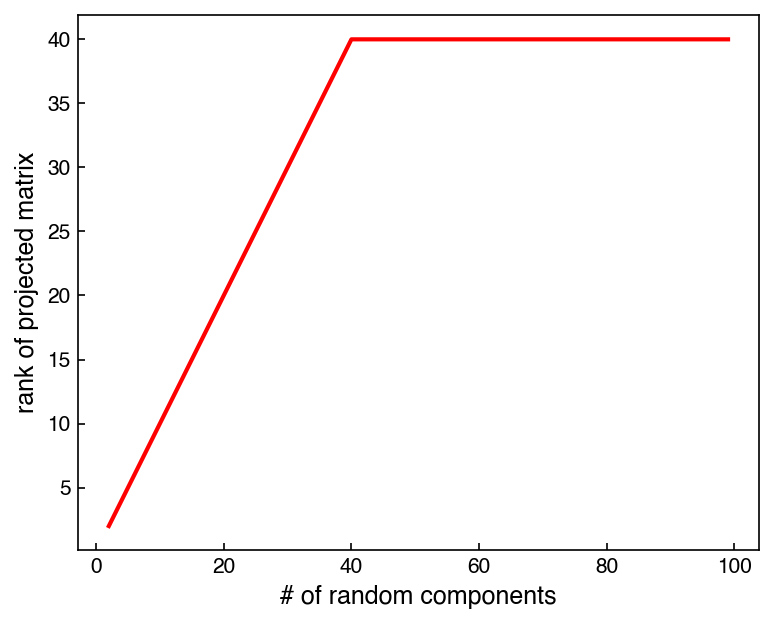

In [19]:
ranks = []
for i in range(2, 100):
    W_rand = np.random.rand(X.shape[1], i)
    
    Xtilde_rand = linear_combination(X, W_rand)
    ranks.append(np.linalg.matrix_rank(Xtilde_rand))
    
fig, ax = plt.subplots(figsize = (5.5, 4.5))
ax.plot(range(2, 100), ranks, 'r-')
ax.set_xlabel('# of random components')
ax.set_ylabel('rank of projected matrix');

Let's see how our random matrix performs as input to a simple linear regression model:

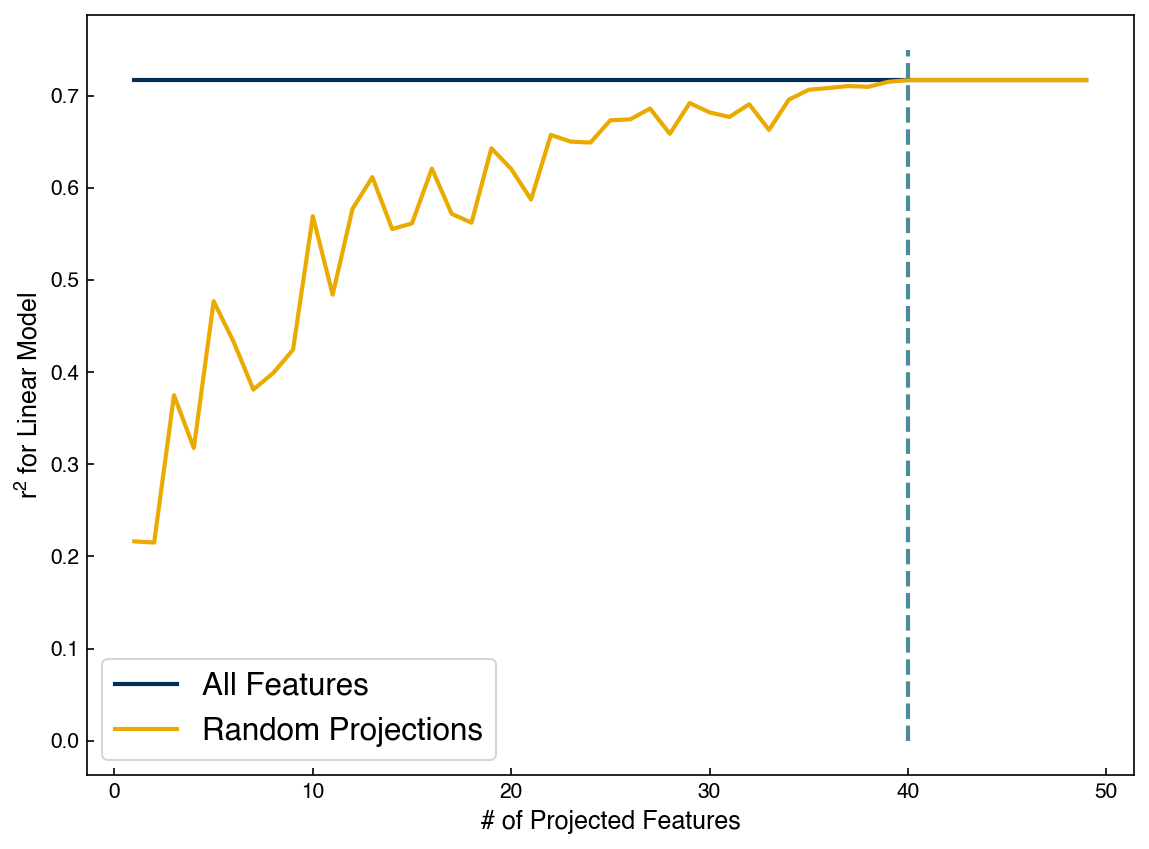

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y_dow)
r2_LR = model.score(X, y_dow)


r2s_rand = []
m_range = range(1, 50)
for m in m_range:
    W_rand = np.random.rand(X.shape[1], m)
    Xtilde_rand = linear_combination(X, W_rand)
    model.fit(Xtilde_rand, y_dow)
    r2 = model.score(Xtilde_rand, y_dow)
    r2s_rand.append(r2)
    
    
fig, ax = plt.subplots()
ax.plot(m_range, [r2_LR] * len(m_range), '-', label = 'All Features')
ax.plot(m_range, r2s_rand, '-', label = 'Random Projections')
ax.plot(40 * np.ones(100), np.linspace(0, 0.75, 100), '--')
ax.set_xlabel('# of Projected Features')
ax.set_ylabel('$r^2$ for Linear Model')
ax.legend();

We see that the performance varies, but generally increases with the number of features up to 40 (the number of features in the original dataset). Beyond this point the performance is the same. The reason is that the linear regression equations find the linear combinations of features that best predict the output, $y$, so as long as the rank is at least equal to the rank of the original data the linear regression process will "undo" the random linear combination and find the model that best predicts the data!

### PCA 

We have also seen that we can use PCA to find linear combinations of features that maximize the variance in the input data. Let's see how this compares. We will use our "manual" PCA implementation (eigenvectors of the covariance matrix) to make this a little more transparent:

In [21]:
cov = np.cov(X.T)
print('Covariance Matrix Shape: {}'.format(cov.shape))
eigvals, eigvecs = np.linalg.eig(cov)
idxs = np.argsort(eigvals)[::-1] #find the indices in order, and reverse them
eigvals = eigvals[idxs]
eigvecs = eigvecs[:, idxs].T

Covariance Matrix Shape: (40, 40)


Now, remember that we can find the PCA projection matrix by taking the first $m$ eigenvectors:

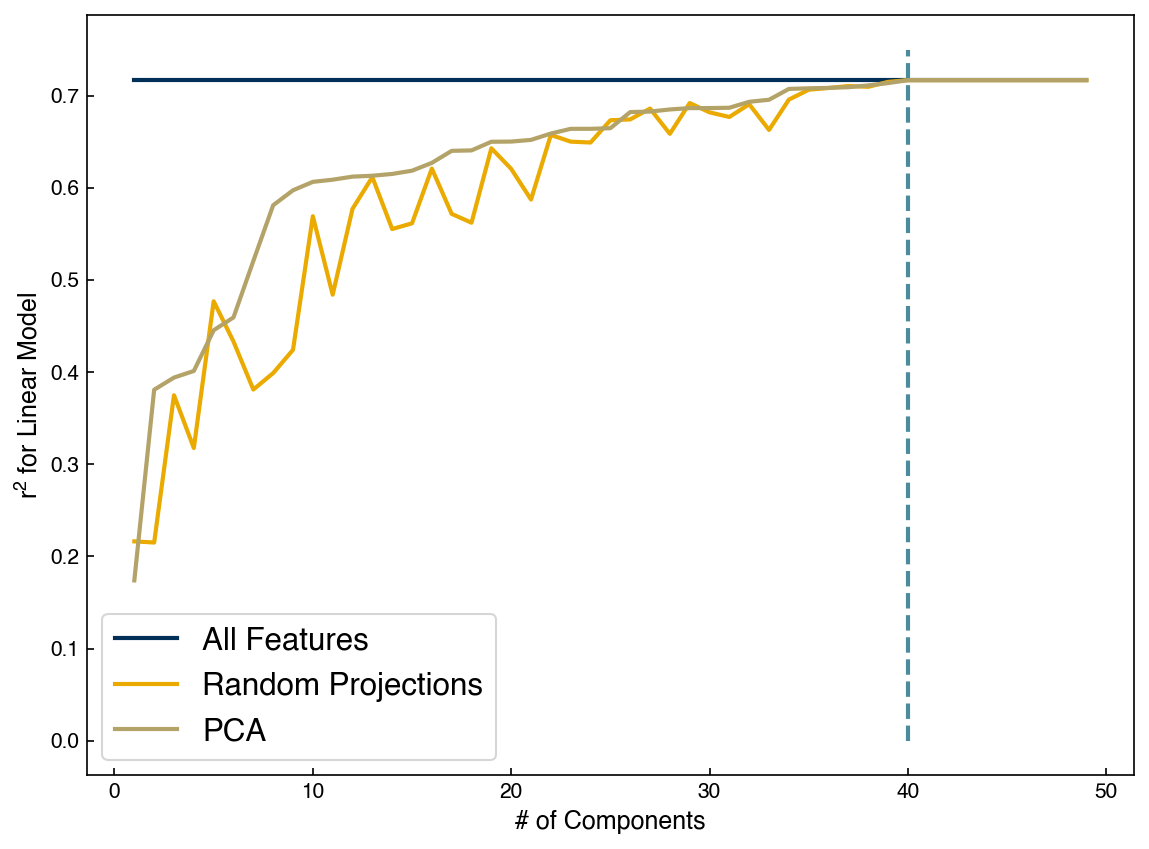

In [22]:
r2s_PCA = []
for m in m_range:
    W_PCA = eigvecs[:m, :].T
    Xtilde_PCA = linear_combination(X, W_PCA)
    model.fit(Xtilde_PCA, y_dow)
    r2 = model.score(Xtilde_PCA, y_dow)
    r2s_PCA.append(r2)
    
fig, ax = plt.subplots()
ax.plot(m_range, [r2_LR]*len(m_range), '-', label = 'All Features')
ax.plot(m_range, r2s_rand, '-', label = 'Random Projections')
ax.plot(40 * np.ones(100), np.linspace(0, 0.75, 100), '--')
ax.plot(m_range, r2s_PCA, '-', label = 'PCA')
ax.set_xlabel('# of Components')
ax.set_ylabel('$r^2$ for Linear Model')
ax.legend();

We see that in general the PC's are better than the random projection, which is a good sign. However, if you run the random block enough you can find examples where random projections are better than principle components! Ideally we would like to avoid this, and find a way of engineering linear combinations of features that always improve the linear regression model.

### Partial Least Squares (PLS)

The "partial least squares", or PLS, algorithm provides a way to find linear combinations of features that maximize the *covariance* (or correlation) between input features and an output variable. This is a **supervised dimensional reduction** algorithm since it uses the outputs to find the projection matrix. We won't do the math for PLS, but will use the `scikit-learn` implementation:

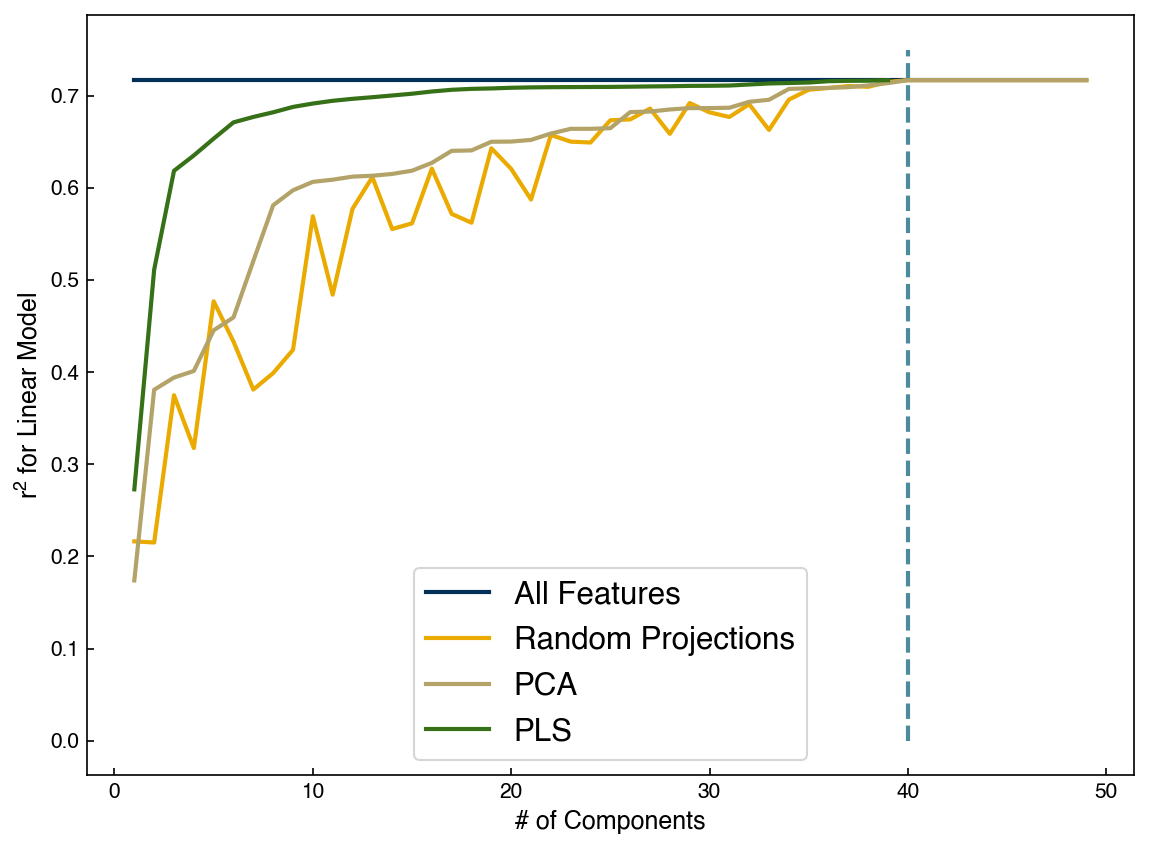

In [23]:
from sklearn.cross_decomposition import PLSRegression

r2s_PLS = []
m_PLS = range(1, X.shape[1]) #PLS does not allow more components than original features
for m in m_PLS:
    model = PLSRegression(n_components = m)
    model.fit(X, y_dow)
    r2 = model.score(X, y_dow)
    r2s_PLS.append(r2)
    
fig, ax = plt.subplots()
ax.plot(m_range, [r2_LR] * len(m_range), '-', label = 'All Features')
ax.plot(m_range, r2s_rand, '-', label = 'Random Projections')
ax.plot(40 * np.ones(100), np.linspace(0, 0.75, 100), '--')
ax.plot(m_range, r2s_PCA, '-', label = 'PCA')
ax.plot(m_PLS, r2s_PLS, '-', label = 'PLS')
ax.set_xlabel('# of Components')
ax.set_ylabel('$r^2$ for Linear Model')
ax.legend();

We can obtain the projection matrix based on the `x_rotations_` described in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cross_decomposition.PLSRegression.html):

In [24]:
m = 15

model = PLSRegression(n_components = m)
model.fit(X, y_dow)
W_PLS = model.x_weights_ @ np.linalg.inv(model.x_loadings_.T@model.x_weights_)
X_PLS = linear_combination(X, W_PLS)
print(X_PLS.shape)

(10297, 15)


or we can obtain the transformed features directly from the model:

In [25]:
X_reduced = model.transform(X)
print((X_reduced - X_PLS).max())

0.0012907819387280028


While there are slight differences, these are numerically very close. In practice, it is typically more convenient to use the `model.transform` method. This gives us the linear combination of features that maximizes the covariance with the model output. We can think of this as the best possible *linear* combination of features for a *linear* regression problem.

### Exercise: Create a KRR model based on the first 5 PLS components

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y_dow, test_size = 0.3)

pls = PLSRegression(n_components = 5)
pls.fit(X_train, y_train)
pls_train = pls.transform(X_train)
pls_test = pls.transform(X_test)

from sklearn.kernel_ridge import KernelRidge

krr = KernelRidge(kernel = 'rbf')
alphas = np.logspace(-4, -1, 4)
gammas = np.logspace(-6, -3, 4)
param_grid = {'alpha': alphas, 'gamma': gammas}

krr_search = GridSearchCV(krr, param_grid, cv = 3)
krr_search.fit(pls_train, y_train)

print('r2 of the hyperparameter tuned KRR model: {}'.format(krr_search.best_estimator_.score(pls_test, y_test)))

r2 of the hyperparameter tuned KRR model: 0.7386369445677243


### Linear Discriminant Analysis (LDA)

The PLS technique works great for finding linear combinations of features that describe a regression problem, but it does not work for classfication. The analogue for classification is called "Linear Discriminant Analysis", or LDA. 

The basic steps of LDA are:

* Compute the centerpoint of each class
* Compute intraclass covariance
* Compute interclass covariance
* Calculate the largest eigenvalues/eigenvectors of the composite covariance matrix
* Use hyperplanes perpendicular to the linear discriminant vectors to assign classes

We will step through these steps for a toy "blobs" dataset, then compare to the `scikit-learn` implementation for the MNIST dataset.

#### Step 1: Compute class centroids

Mean Vector class 0: [0.98137069 4.28756914]

Mean Vector class 1: [2.02437058 0.95630346]



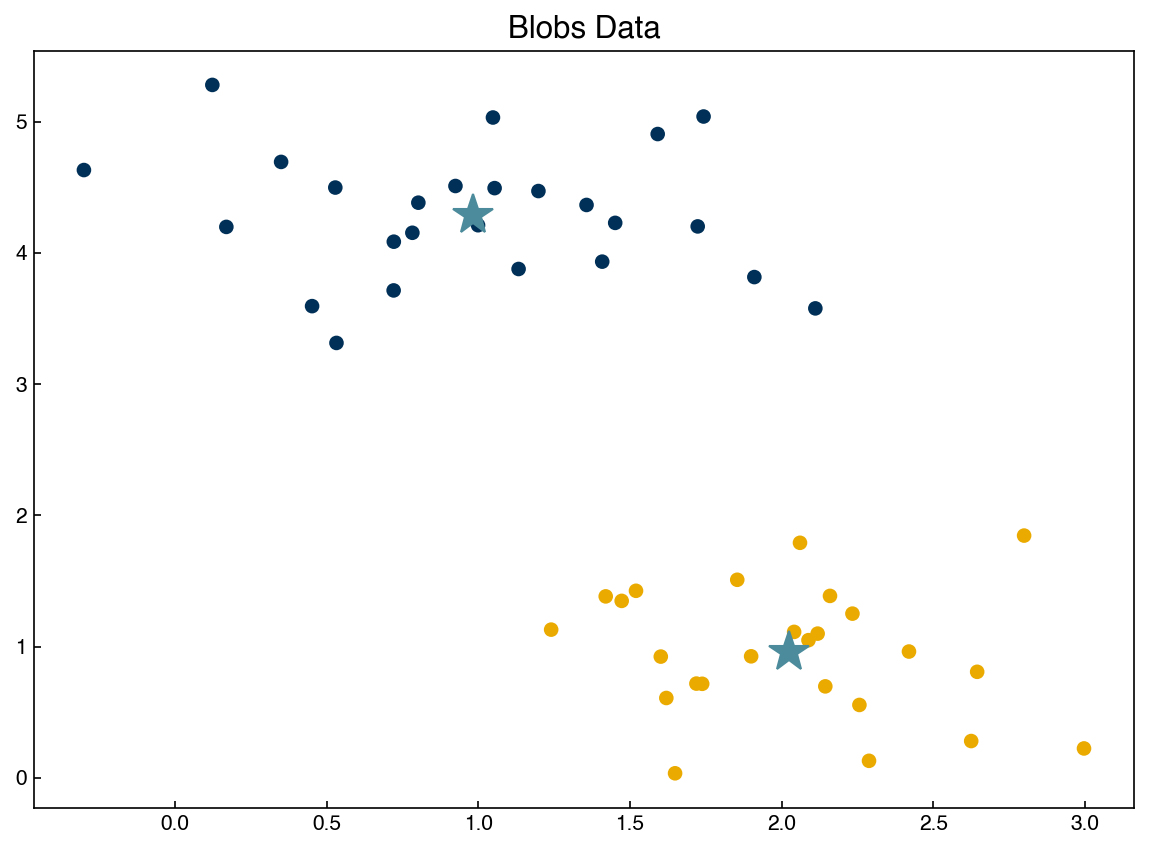

In [27]:
from sklearn.datasets import make_blobs

X_blobs, y_blobs = make_blobs(n_samples = 50, centers = 2, cluster_std = 0.5, n_features = 2, random_state = 0)

mean_vectors = []
classes = [0, 1]
for cl in classes:
    class_mean = np.mean(X_blobs[y_blobs == cl, :], axis = 0)
    mean_vectors.append(class_mean)
    print('Mean Vector class {}: {}\n'.format(cl, mean_vectors[cl]))
    
fig, ax = plt.subplots()

ax.scatter(X_blobs[:, 0], X_blobs[:, 1], c = clrs[y_blobs])
for mv in mean_vectors:
    ax.plot(mv[0], mv[1], marker = '*', markersize = 20, c = clrs[2])
    
ax.set_title('Blobs Data');

#### Step 2: Compute the intra-class (within class) covariance

Now we want the co-variance of each class, centered on the mean of that class.

In [28]:
class_covs = []
for cl, center in zip(classes, mean_vectors):
    subX = X_blobs[y_blobs == cl] #select only points from class
    subX_centered = subX - center
    cov = np.dot(subX_centered.T, subX_centered)
    cov = cov / (subX.shape[0] - 1)
    class_covs.append(cov)
    print('Covariance matrix of class {}'.format(cl))
    print(cov, '\n')
    
print(len(class_covs))
print(class_covs[0].shape)

Covariance matrix of class 0
[[ 0.35831647 -0.04297633]
 [-0.04297633  0.24224462]] 

Covariance matrix of class 1
[[ 0.20437148 -0.04095813]
 [-0.04095813  0.23816294]] 

2
(2, 2)


LDA assumes that all classes have the **same covariance**, so we will take an average over them to compute the **intra-class covariance matrix**.

In [29]:
intra = sum(class_covs) / len(class_covs)
print(intra)

[[ 0.28134397 -0.04196723]
 [-0.04196723  0.24020378]]


#### Step 3: Compute inter-class covariance

Now we also need to know the covariance matrix between different class centers. We will use the class means as points to achieve this, and we will save some time by using numpy's built-in covariance function:

In [30]:
center_array = np.array(mean_vectors)
inter = np.cov(center_array.T)
print(inter)

[[ 0.54392438 -1.73725486]
 [-1.73725486  5.54866553]]


#### Step 4: Take the largest eigenvalues/vectors of the composite covariance

We need to "divide" the inter-class (across class) covariance by the inter-class (within class) covariance. However, since we are dealing with matrices we use the inverse:

$\underline{\underline{C}}_{composite} = \underline{\underline{C}}_{intra}^{-1} \underline{\underline{C}}_{inter}$

This is called the "composite covariance matrix", and the linear discrimination axes can be determined by taking its eigenvalues.

[ 0.         23.48758374]


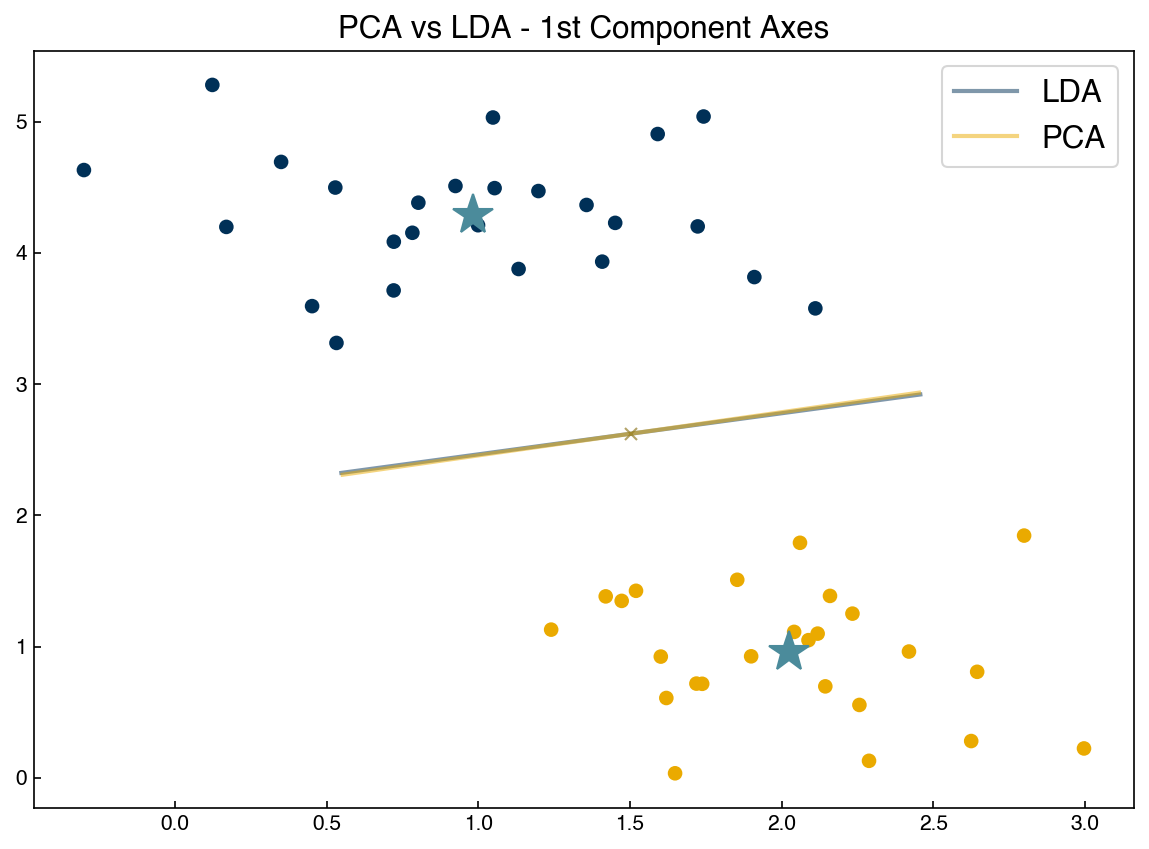

In [31]:
comp = np.dot(np.linalg.inv(intra), inter)
eig_vals, eig_vecs = np.linalg.eig(comp)
eig_vecs = eig_vecs.T

print(eig_vals)

fig, ax = plt.subplots()

ax.scatter(X_blobs[:, 0], X_blobs[:, 1], c = clrs[y_blobs])
for mv in mean_vectors:
    ax.plot(mv[0], mv[1], marker = '*', markersize = 20, color = clrs[2])
    
LDvec1 = eig_vecs[0]
LDvec2 = eig_vecs[1]

mu = np.mean(X_blobs, axis = 0)

ax.plot([mu[0]], [mu[1]], marker = 'x', c = clrs[3])

#ax.plot([mu[0], mu[0] + LDvec1[0] * LDvals[0]],[mu[1],mu[1] + LDvec1[1]*LDvals[0]], ls='-', color='r', alpha=0.5) #<- plot eigenvectors scaled by eigenvalues
ax.plot([mu[0] - LDvec1[0], mu[0] + LDvec1[0]], [mu[1] -  LDvec1[1],mu[1] + LDvec1[1]], ls = '-', alpha=0.5, c = clrs[0], label = 'LDA')

# compare to PCA
cov_all = np.cov(X_blobs.T)
PC_vals, PC_vecs = np.linalg.eig(cov_all)
PC_vecs = PC_vecs.T

PCvec1 = PC_vecs[0]
PCvec2 = PC_vecs[1]

ax.plot([mu[0] - PCvec1[0], mu[0] + PCvec1[0]], [mu[1] -  PCvec1[1],mu[1] + PCvec1[1]], ls = '-', alpha=0.5, c = clrs[1], label = 'PCA')
ax.legend()
ax.set_title('PCA vs LDA - 1st Component Axes');

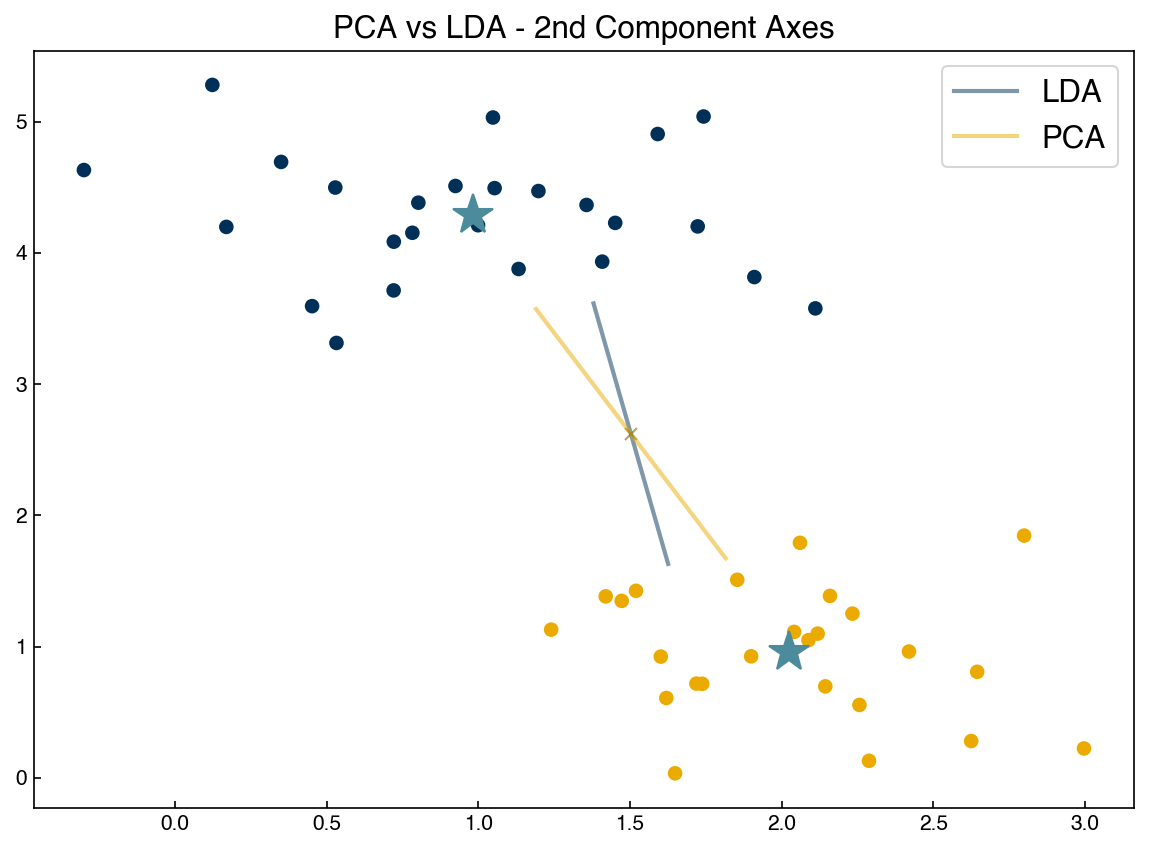

In [32]:
fig, ax = plt.subplots()

ax.scatter(X_blobs[:, 0], X_blobs[:, 1], c = clrs[y_blobs])

for mv in mean_vectors:
    ax.plot(mv[0], mv[1], marker = '*', markersize = 20, color = clrs[2])

ax.plot([mu[0]], [mu[1]], marker = 'x', c = clrs[3])
ax.plot([mu[0] - LDvec2[0], mu[0] + LDvec2[0]], [mu[1] -  LDvec2[1],mu[1] + LDvec2[1]], ls = '-', alpha=0.5, c = clrs[0], label = 'LDA')


ax.plot([mu[0] - PCvec2[0], mu[0] + PCvec2[0]], [mu[1] -  PCvec2[1],mu[1] + PCvec2[1]], ls = '-', alpha=0.5, c = clrs[1], label = 'PCA')
ax.legend()
ax.set_title('PCA vs LDA - 2nd Component Axes');

#### Step 5: Find the perpendicular vector to use as the decision boundary

LDA is also a classification algorithm. In LDA the decision boundary line or hyperplane is perpendicular to the LDA axis. We can find a perpendicular vector using the 90-degress rotation matrix:

$[[0, -1] \\ [1, 0]]$

In higher dimensions this can be achieved with cross-products.

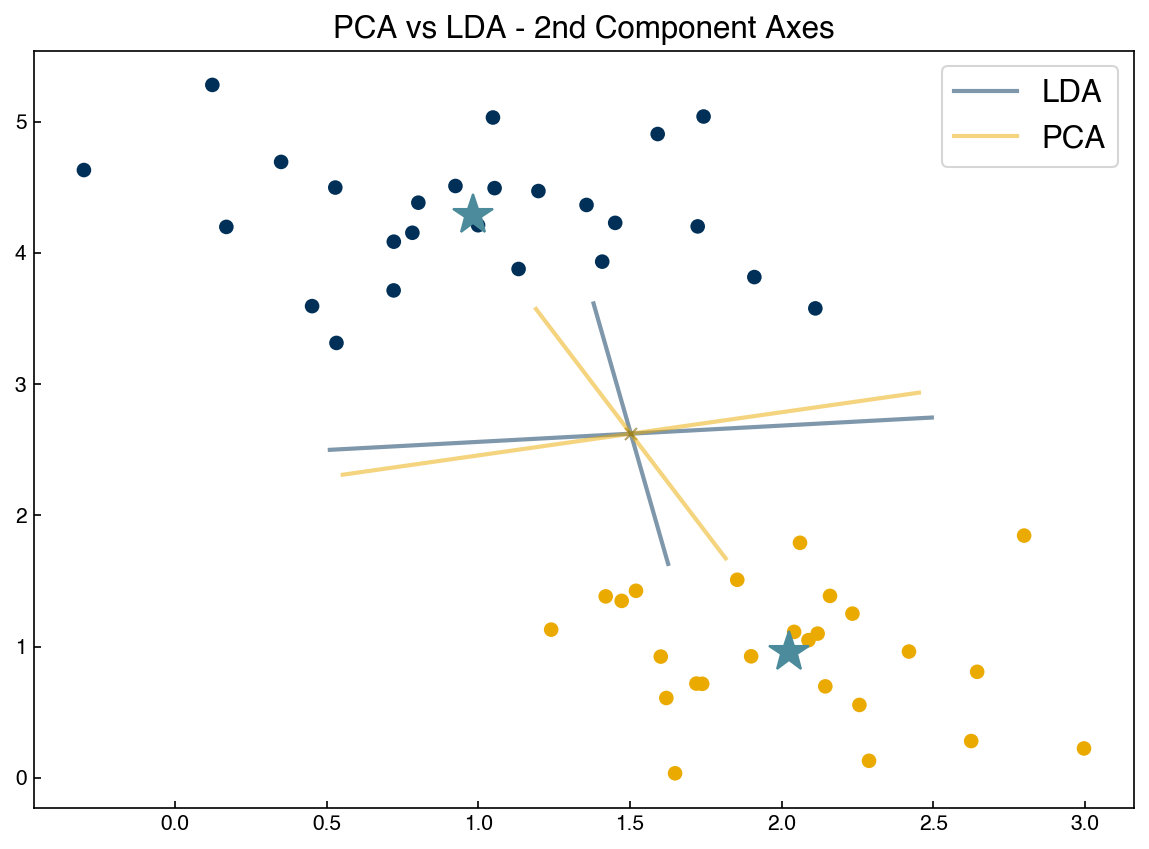

In [33]:
boundary = np.dot([[0, -1], [1, 0]], LDvec2)
ax.plot([mu[0] - boundary[0], mu[0] + boundary[0]], [mu[1] -  boundary[1],mu[1] + boundary[1]], ls = '-', alpha=0.5, c = clrs[0], label = 'LDA')

#compare to PCA boundary

PCboundary = np.dot([[0, -1], [1, 0]], PCvec2)
ax.plot([mu[0] - PCboundary[0], mu[0] + PCboundary[0]], [mu[1] -  PCboundary[1],mu[1] + PCboundary[1]], ls = '-', alpha=0.5, c = clrs[1], label = 'PCA')

fig

The LDA vectors capture the direction of max variance between different cluster centers. In fact, if you compare the math this is very similar to what we are doing. We treat each cluster as a point, then perform PCA on these points. We can also project the data back onto the LDA axes:

(50, 2)


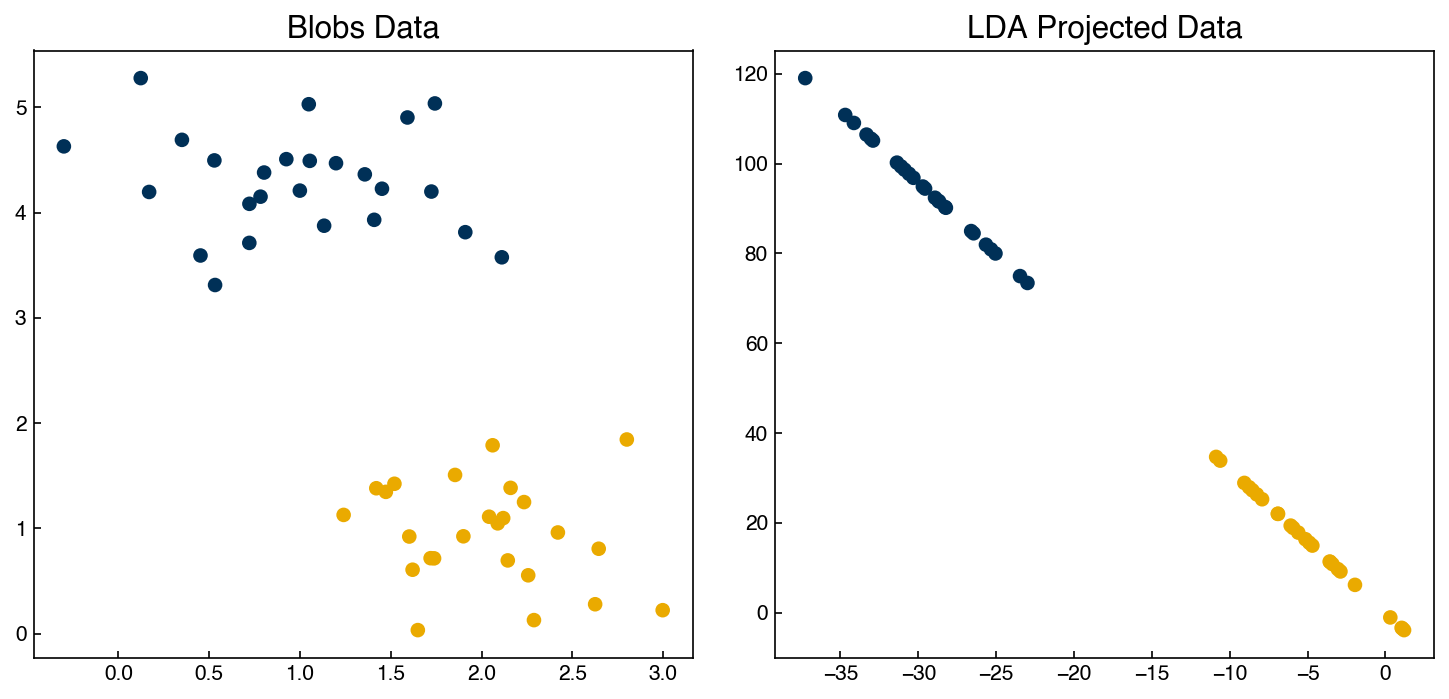

In [34]:
X_LDA = linear_combination(X_blobs, comp)
print(X_LDA.shape)

fig, axes = plt.subplots(1, 2, figsize = (10,5))

axes[0].scatter(X_blobs[:, 0], X_blobs[:, 1], c = clrs[y_blobs])
axes[1].scatter(X_LDA[:, 0], X_LDA[:, 1], c = clrs[y_blobs])

axes[0].set_title('Blobs Data')
axes[1].set_title('LDA Projected Data');

Note that the maximum number of linearly-independent LDA components is one less than the number of clusters.

#### Application to MNIST

Now let's see how this works for the MNIST dataset.

In [35]:
from sklearn.datasets import load_digits

digits = load_digits()
print("Digits data shape: {}".format(digits.data.shape))
print("Digits output shape: {}".format(digits.target.shape))
X_mnist = np.array(digits.data)
y_mnist = np.array(digits.target)

Digits data shape: (1797, 64)
Digits output shape: (1797,)


We will use the `scikit-learn` implementation since it is more efficient:

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_mnist, y_mnist)
X_LDA = lda.transform(X_mnist)

print(X_LDA.shape)

(1797, 9)


We see that the dimension of features is 9, one less than the number of classes. There is also a warning that arises from the fact that there are linearly dependent columns in the original data.

We can extract the weights, or transform the X matrix directly with `scikit-learn`:

In [37]:
W_lda = lda.scalings_
X_lda = linear_combination(X_mnist, W_lda)
print(X_lda.shape)

(1797, 9)


Let's compute the PCA decomposition to compare:

In [38]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components = 9)
pca_model.fit(X_mnist)
X_pca = pca_model.transform(X_mnist)

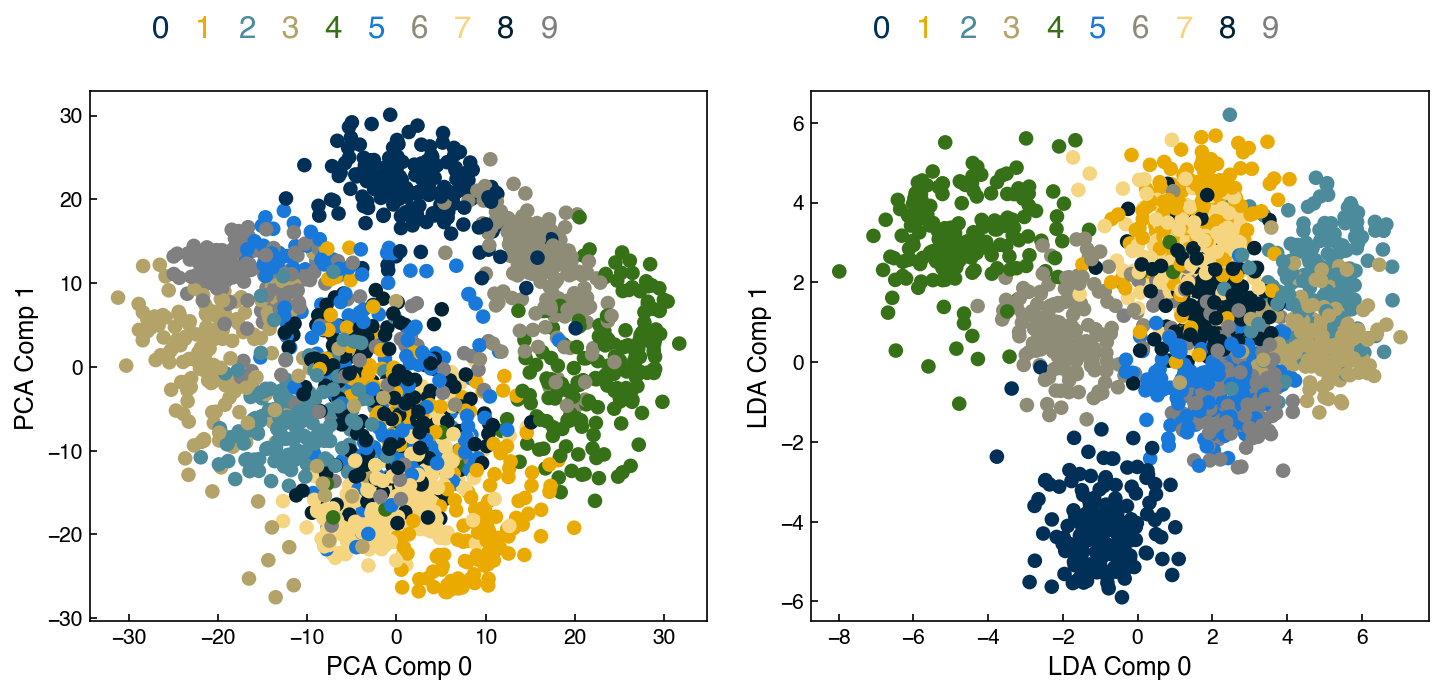

In [39]:
def add_labels(ax, cmap = plt.cm.viridis):
    colors = [cmap((i / 9.)) for i in range(10)]
    xpos = 0.1
    for label in range(0, 10):
        c = clrs[label]
        ax.annotate(str(label), xy = [xpos, 1.1], xycoords = 'axes fraction', color = c, size = 15)
        xpos += 0.07
        
fig,axes = plt.subplots(1, 2, figsize = (10, 5))

comp1 = 0
comp2 = 1

axes[0].scatter(X_pca[:, comp1], X_pca[:, comp2], c = clrs[y_mnist])
axes[0].set_xlabel('PCA Comp {}'.format(comp1))
axes[0].set_ylabel('PCA Comp {}'.format(comp2))

axes[1].scatter(X_lda[:, comp1], X_lda[:, comp2], c = clrs[y_mnist])
axes[1].set_xlabel('LDA Comp {}'.format(comp1))
axes[1].set_ylabel('LDA Comp {}'.format(comp2))

add_labels(axes[0])
add_labels(axes[1]);

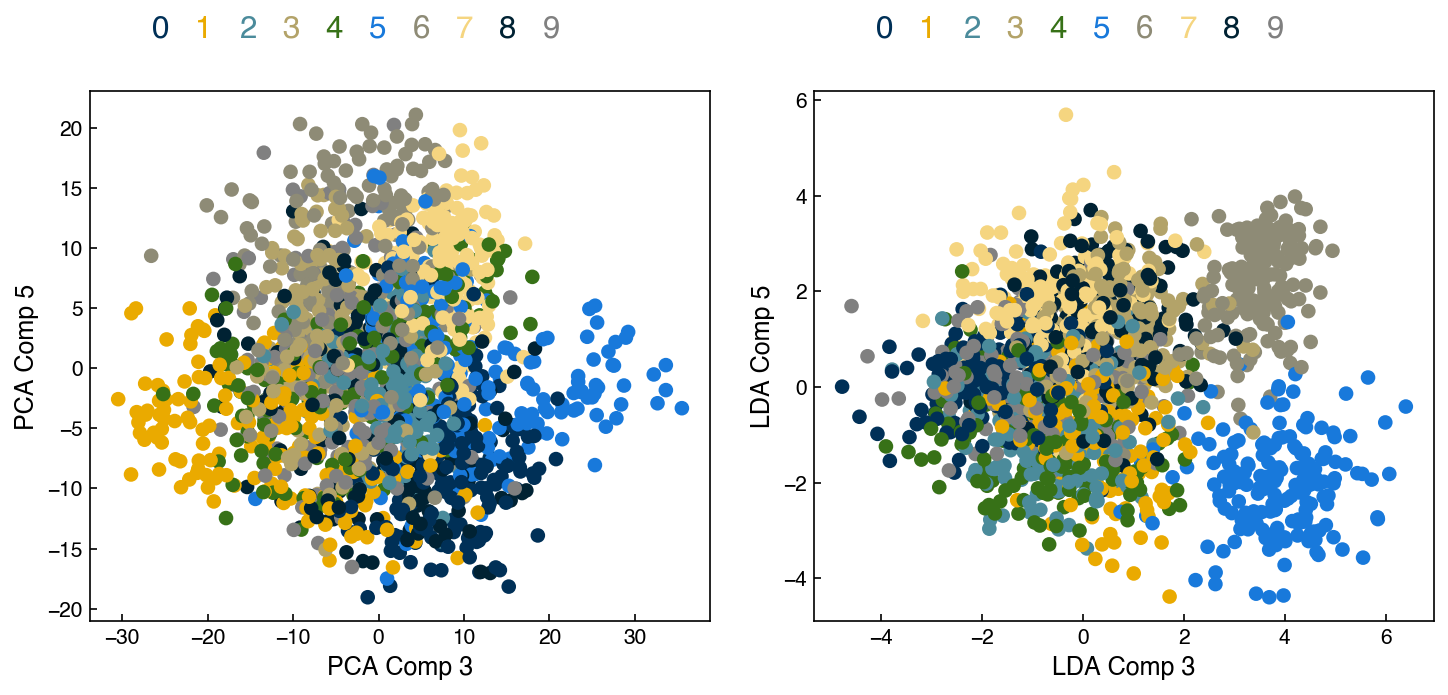

In [40]:
fig,axes = plt.subplots(1, 2, figsize = (10, 5))

comp1 = 3
comp2 = 5

axes[0].scatter(X_pca[:, comp1], X_pca[:, comp2], c = clrs[y_mnist])
axes[0].set_xlabel('PCA Comp {}'.format(comp1))
axes[0].set_ylabel('PCA Comp {}'.format(comp2))

axes[1].scatter(X_lda[:, comp1], X_lda[:, comp2], c = clrs[y_mnist])
axes[1].set_xlabel('LDA Comp {}'.format(comp1))
axes[1].set_ylabel('LDA Comp {}'.format(comp2))

add_labels(axes[0])
add_labels(axes[1]);

We see that there is much clearer separation between one of the classes. If you look at other components you will see that different classes separate. This provides us the best linear combination of features for separating classes.

Linear feature combinations are useful, but if we use a linear model in the end it won't help us much. However, we can still use these linear combinations as inputs to non-linear models where they may lead to simpler or more accurate models. Let's see how our linear LDA classification model compares to a SVM model based on LDA features. First, we can generate training/validation datasets:

In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X_mnist, y_mnist, test_size = 0.4)

Next, we can train an LDA model and check it's accuracy:

In [42]:
lda = LinearDiscriminantAnalysis(n_components = 9)
lda.fit(X_train, y_train)
score = lda.score(X_test, y_test)
print(score)
X_test_LDA = lda.transform(X_test)
X_train_LDA = lda.transform(X_train)

0.9652294853963839


We see that the accuracy is quite high. We can also check the confusion matrix:

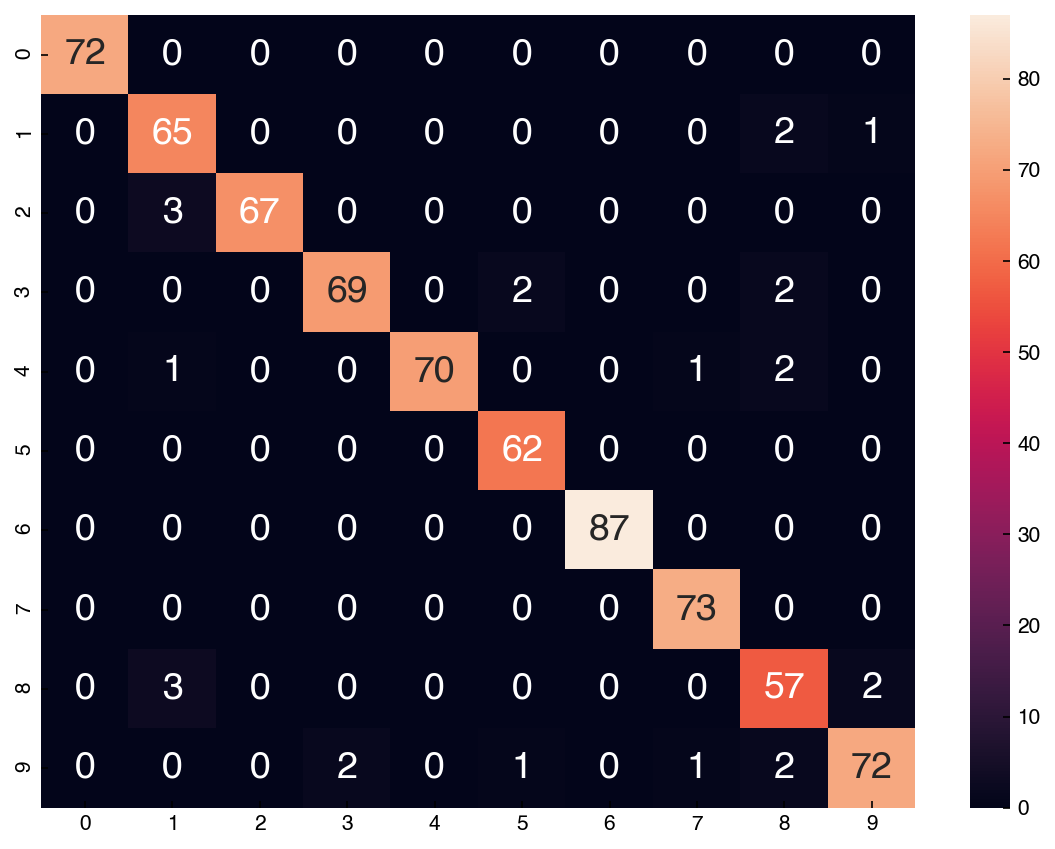

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = lda.predict(X_test)
CM = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(CM, index = range(0, 10), columns = range(0, 10))
sns.heatmap(df_cm, annot=True);

We see that it is doing pretty well, but seems to confuse 8/9, 8/1, and 2/3. Let's try to improve this by building an SVM model. We will compare performance between the full image and the LDA-transformed images. Let's start with a baseline model on the full images:

In [44]:
C_range = np.logspace(-1, 1, 10)
gamma_range = np.logspace(-4, -1, 10)

parameters = {"C": C_range, "gamma": gamma_range}

classifier = SVC(kernel = 'rbf')

clf = GridSearchCV(classifier, parameters)
clf.fit(X_train, y_train)
print(clf.best_estimator_)
print(clf.best_estimator_.score(X_test, y_test))
svc_full = clf.best_estimator_

SVC(C=2.1544346900318834, gamma=0.001)
0.9958275382475661


We see that the performance is slightly better than the LDA model. Let's see how it compares to the performance of a non-linear model built with the LDA-projected input:

In [45]:
parameters = {"C": C_range, "gamma": gamma_range}

classifier = SVC(kernel = 'rbf')

clf = GridSearchCV(classifier, parameters)
clf.fit(X_train_LDA, y_train)
print(clf.best_estimator_)
print(clf.best_estimator_.score(X_test_LDA, y_test))
svc_lda = clf.best_estimator_

SVC(C=0.774263682681127, gamma=0.046415888336127774)
0.972183588317107


The performance is slightly lower than the SVC model, but (very) slightly higher than the pure LDA model. Let's compare timings:

In [46]:
%time svc_full.fit(X_train, y_train)
%time svc_full.score(X_train, y_train)

CPU times: user 80.3 ms, sys: 2.31 ms, total: 82.6 ms
Wall time: 85.5 ms
CPU times: user 60.3 ms, sys: 744 µs, total: 61 ms
Wall time: 62.6 ms


1.0

In [47]:
%time svc_lda.fit(X_train_LDA, y_train)
%time svc_lda.score(X_train_LDA, y_train)

CPU times: user 26.2 ms, sys: 2.1 ms, total: 28.3 ms
Wall time: 30.9 ms
CPU times: user 17 ms, sys: 526 µs, total: 17.5 ms
Wall time: 20.3 ms


0.9897959183673469

While both are quite fast, we see that the LDA model is generally faster both for training and prediction. This shows how LDA features can be used to create models that are significantly faster. As the dimensionality of the original image increases, the speedup will also increase.

### Exercise: Compare the accuracy of LDA model for perovskite prediction with and without the one-hot encoding features.

## Symbolic Regression

The linear feature combinations are useful for reducing the dimensionality of input features, which often improves the efficiency of models and can sometimes even improve the performance of non-parametric models created from these transformed features. However, any linear model will not be improved by using linear feature combinations, and many times the model is not practically simplified since all features still need to be known (for example, all the features have to be measured in order to compute the linear combinations). 

One way around this is to create non-linear combinations of features. We have actually seen some examples of this in 1-dimensional problems. Polynomial regression is one option, but this does not work well in high dimensions because the number of polynomial combinations scales combinatorially, so the number of features increases very rapidly. However, we have also seen some strategies for how to reduce dimensionality and drop features, so we can revisit this strategy.

We can start with a simple example where we create polynomial features with the Dow dataset. First, we can create a testing and training set:

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_dow[::2], y_dow[::2], test_size = 0.5)

Note that we are only using 50% of the data for training, and we are only taking every second data point. This is primarily because we need to create some pretty big matrices, and may run into memory issues if the training set is too large. Next, let's create a baseline linear regression model to compare to:

In [49]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg.score(X_test, y_test)

0.4371018861028526

This is a little lower than what we saw before, but remember that we are only training with 50% of the data and testing on 50%. Next, we can write some code to create first- and second-order features:

In [50]:
def second_order_polynomials(X):
    feat_names = [] # keep track of the feature combination
    n_cols = X.shape[1]
    new_cols = []
    for i in range(n_cols):
        feat_names.append('x' + str(i))
        new_cols.append(X[:, i]) #include all original columns
        for j in range(n_cols):
            if i >= j:
                feat_names.append('x' + str(i) + '*x' + str(j))
                new_cols.append(X[:, i] * X[:, j])
    new_cols = np.array(new_cols).T
    return new_cols, feat_names

X_squared_train, names = second_order_polynomials(X_train)
X_squared_test, names = second_order_polynomials(X_test)
print('Training data shape: {}'.format(X_squared_train.shape))
print('Testing data shape: {}'.format(X_squared_test.shape))

Training data shape: (2574, 860)
Testing data shape: (2575, 860)


### Exercise: Derive a formula for the number of polynomial features as a function of number of original features and polynomial order.

Let's see what happens if we train with all these features:

In [51]:
linreg = LinearRegression()
linreg.fit(X_squared_train, y_train)
r2_train = linreg.score(X_squared_train, y_train)
r2_test = linreg.score(X_squared_test, y_test)
print('Training R^2: {}'.format(r2_train))
print('Testing R^2: {}'.format(r2_test))

Training R^2: 0.9445582874788537
Testing R^2: -74565.23587921228


The training data is fit very well, but the model performs terribly on the testing data! We need to control for over-fitting. In this case, we can reduce the number of parameters by reducing the number of features (although other forms of regularization will also work). There are many ways we could do this, some of which are discussed in the regression and dimensional reduction modules. Let's try LASSO regression:

In [52]:
from sklearn.linear_model import Lasso

model = Lasso(alpha = 1.0)
model.fit(X_squared_train, y_train)
r2_train = model.score(X_squared_train, y_train)
r2_test = model.score(X_squared_test, y_test)
print('Training R^2: {}'.format(r2_train))
print('Testing R^2: {}'.format(r2_test))

Training R^2: 0.8675074823236838
Testing R^2: 0.4709470590492988


We can see that the training $R^2$ decreases, but the testing $R^2$ is now even better than regular linear regression! Note that there may also be a convergence warning, telling us that there may be an even better solution if we tweak the optimizer, but for now we will accept the sub-optimal (non-converged) solution. Note that we have also arbitrarily set `alpha` to 1.0, which could also be optimized, but let's see what the coefficients look like:

In [53]:
coeffs = model.coef_
print("Total Number of Coefficients: {}".format(len(coeffs)))
nonzero_coeffs = [c for c in coeffs if abs(c) > 0]
print("Number of Non-Zero Coefficients: {}".format(len(nonzero_coeffs)))

Total Number of Coefficients: 860
Number of Non-Zero Coefficients: 198


We see that there are still 100-200 non-zero coefficients selected. We can decrease this by increasing `alpha`:

In [54]:
model = Lasso(alpha = 10)
model.fit(X_squared_train, y_train)
r2_train = model.score(X_squared_train, y_train)
r2_test = model.score(X_squared_test, y_test)
print('Training R^2: {}'.format(r2_train))
print('Testing R^2: {}'.format(r2_test))
coeffs = model.coef_
print("Total Number of Coefficients: {}".format(len(coeffs)))
nonzero_coeffs = [c for c in coeffs if abs(c) > 0]
print("Number of Non-Zero Coefficients: {}".format(len(nonzero_coeffs)))

Training R^2: 0.8441843824568278
Testing R^2: 0.6338582465082598
Total Number of Coefficients: 860
Number of Non-Zero Coefficients: 97


We see that there are now only around 100 features, and the $R^2$ is very similar (note that results will vary based on the test/train set you have). We can also interpret these features based on the "names" we stored earlier:

In [55]:
sorted_coef_idxs = np.argsort(coeffs)[::-1] #indexes of coefficients from largest to smallest
show_largest_N = 10 #only show this many
for i in sorted_coef_idxs[:show_largest_N]:
    if abs(coeffs[i]) > 0:
        print(names[i] + '\t' + str(coeffs[i]))

x5*x5	0.0005278948503882602
x5*x4	0.00020618117548778573
x22*x9	5.463631783083644e-05
x22*x6	3.8561127655177606e-05
x13*x2	3.474948163577316e-05
x23*x2	3.072342055142046e-05
x9*x3	2.968580839797822e-05
x25*x22	2.3381658056795828e-05
x37*x2	2.087230485636452e-05
x30*x22	1.8575284616791975e-05


We can try to interpret this by reviewing the feature names:

In [56]:
print('Feature 5: {}'.format(dow_feature_names[5]))

Feature 5: x6:Primary Column Make Flow


It's a little hard to make sense of this without knowing more about the meaning of the data, and the results may vary based on the train/test split, but it looks like second-order effects between the primariy column make flow seem to be relevant for predicting the impurity level.

This approach seems powerful, but it has a few downsides:

* We are only looking at polynomial combinations. Other transforms (exp, log, sin, cos, etc.) are not captured
* This is only second-order effects. We could do the same for third-order, but would get a *lot* of features
* We haven't accounted for units. It's hard to say whether the units of the variable combinations make sense

A technique called `symbolic regression` can help overcome these issues. There are a variety of approaches and implementations for symbolic regression, but they generally involve:

1) generate a large number of non-linear feature combinations

2) select the combinations that are most highly correlated with the output

In some appraches these steps are done symbolically through genetic algorithms (e.g. [Eureqa](https://www.nutonian.com/products/eureqa/)), or in other approaches step (1) is done first and techniques such as global optimization (e.g. [ALAMO](https://arxiv.org/pdf/1705.10918.pdf)) or feature selection (e.g. [SISSO](https://journals.aps.org/prmaterials/abstract/10.1103/PhysRevMaterials.2.083802)) are done subsequently. In additon, the units of features are sometimes used to avoid "illegal" operations (e.g. subtracting temperature from pressure) The details of these techniques are beyond the scope of this course, but we will work with a library called [`autofeat`](https://arxiv.org/pdf/1901.07329.pdf). This generates all combinations of features, then uses LASSO to select features. It is also implemented in `scikit-learn` style, so it is pretty easy to use, and was developed by BASF so it is appropriate for this course!



In [57]:
# ! pip install autofeat

There are both regression and classification models available, but we will start with regression:

In [58]:
from autofeat import AutoFeatRegressor

There are quite a few hyper-parameters that you can read about using `help`:

In [59]:
#help(AutoFeatRegressor)

The key hyperparameters are `transformations` which tell it which non-linear transformations to use, and  `feateng_steps` which tells the "depth" of the tree (how many non-linear transforms can be combined). The number of features will scale exponentially with this, so be careful! There is also the `featsel_runs`, which controls the number of cross-validation runs. We are just going to use 1 since this is pretty time consuming.

In [60]:
transforms = ['1/', 'exp', 'abs', 'sqrt', '^2', '^3']
afreg = AutoFeatRegressor(verbose = 1, feateng_steps = 2, featsel_runs = 1, transformations = transforms)
afreg.fit(X_train, y_train)

[AutoFeat] Warning: This just calls fit_transform() but does not return the transformed dataframe.
[AutoFeat] It is much more efficient to call fit_transform() instead of fit() and transform()!
[AutoFeat] The 2 step feature engineering process could generate up to 28920 features.
[AutoFeat] With 2574 data points this new feature matrix would use about 0.30 gb of space.
[feateng] Step 1: transformation of original features
[feateng] Generated 161 transformed features from 40 original features - done.
[feateng] Step 2: first combination of features
[feateng] Generated 19945 feature combinations from 20100 original feature tuples - done.
[feateng] Generated altogether 20112 new features in 2 steps
[feateng] Removing correlated features, as well as additions at the highest level


/Users/SihoonChoi/opt/anaconda3/lib/python3.7/site-packages/sympy/__init__.py:676: SymPyDeprecationWarning: 

importing sympy.core.add with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.core.add instead. See
https://github.com/sympy/sympy/issues/18245 for more info.

  deprecated_since_version="1.6").warn()


[feateng] Generated a total of 7804 additional features
[featsel] Scaling data...done.
[featsel] Feature selection run 1/1
[featsel] 32 features after 1 feature selection runs
[featsel] 31 features after correlation filtering
[featsel] 27 features after noise filtering
[AutoFeat] Computing 27 new features.
[AutoFeat]    27/   27 new features ...done.
[AutoFeat] Final dataframe with 67 feature columns (27 new).
[AutoFeat] Training final regression model.
[AutoFeat] Trained model: largest coefficients:
0.4401047411428527
-0.521914 * x010/x037
-0.136054 * x010**3/x022
-0.001261 * exp(x024)/x016
0.000746 * Abs(x002)/x009
0.000331 * x015**2/x009
-0.000234 * x001**3/x028
0.000075 * x011**3/x005
0.000030 * x006**2/x005
0.000014 * x004**3/x010
[AutoFeat] Final score: 0.8317


AutoFeatRegressor(featsel_runs=1,
                  transformations=['1/', 'exp', 'abs', 'sqrt', '^2', '^3'],
                  verbose=1)

Note that we set `verbose=1` so that we can see the progress as the algorithm runs. This combination of hyperparameters already leads to >25K features, which is pushing the limits of most laptops. We can check the new features that were determined to be most correlated:

In [61]:
afreg.new_feat_cols_

['x010/x037',
 'x005**3/x011',
 'x006**2/x005',
 'x005**3*x032',
 'x037**3/x021',
 'x000**3/x009',
 'x010**3/x022',
 'x011**3/x005',
 'x015**2/x009',
 'x001**3/x028',
 'x004**3/x010',
 'Abs(x002)/x009',
 'exp(x024)/x016',
 'x024**3*x031**3',
 'x001**3*x008**3',
 'x005**3*x023**3',
 'x009**2*x016**3',
 'x022**3*x031**3',
 'x022**3*x032**3',
 'x002**3*x012**3',
 'x005**3*x030**3',
 'x027**3*x037**3',
 'x009**3*x022**3',
 'x002**3*x024**3',
 'x023**3*x031**3',
 'x005**3*x009**2',
 'x016**3*exp(x024)']

We can also check to see all of the features that were selected by the feature selection algorithm:

In [62]:
afreg.good_cols_

['x010/x037',
 'x005**3/x011',
 'x006**2/x005',
 'x005**3*x032',
 'x037**3/x021',
 'x000**3/x009',
 'x010**3/x022',
 'x011**3/x005',
 'x015**2/x009',
 'x001**3/x028',
 'x004**3/x010',
 'Abs(x002)/x009',
 'exp(x024)/x016',
 'x024**3*x031**3',
 'x001**3*x008**3',
 'x005**3*x023**3',
 'x009**2*x016**3',
 'x022**3*x031**3',
 'x022**3*x032**3',
 'x002**3*x012**3',
 'x005**3*x030**3',
 'x027**3*x037**3',
 'x009**3*x022**3',
 'x002**3*x024**3',
 'x023**3*x031**3',
 'x005**3*x009**2',
 'x016**3*exp(x024)']

The "good" columns are the ones that are selected after final round of feature selection and used in the prediction model. We can see that there are some ratios, polynomials, and absolute values in the feature list. We can see how well it works on the training data:

In [63]:
afreg.score(X_test, y_test)

[AutoFeat] Computing 27 new features.
[AutoFeat]     0/   27 new features
[AutoFeat]     1/   27 new features
[AutoFeat]     2/   27 new features
[AutoFeat]     3/   27 new features
[AutoFeat]     4/   27 new features
[AutoFeat]     5/   27 new features
[AutoFeat]     6/   27 new features
[AutoFeat]     7/   27 new features
[AutoFeat]     8/   27 new features
[AutoFeat]     9/   27 new features
[AutoFeat]    10/   27 new features
[AutoFeat]    11/   27 new features
[AutoFeat]    12/   27 new features
[AutoFeat]    13/   27 new features
[AutoFeat]    14/   27 new features
[AutoFeat]    15/   27 new features
[AutoFeat]    16/   27 new features
[AutoFeat]    17/   27 new features
[AutoFeat]    18/   27 new features
[AutoFeat]    19/   27 new features
[AutoFeat]    20/   27 new features
[AutoFeat]    21/   27 new features
[AutoFeat]    22/   27 new features
[AutoFeat]    23/   27 new features
[AutoFeat]    24/   27 new features
[AutoFeat]    25/   27 new features
[AutoFeat]    26/   27 new

0.16888297181098244

Or we can create a new feature matrix that contains all the new features (instead of just the "good" ones) and build our own linear regression model:

In [64]:
X_afreg_train = afreg.transform(X_train)
X_afreg_test = afreg.transform(X_test)

[AutoFeat] Computing 27 new features.
[AutoFeat]    27/   27 new features ...done.
[AutoFeat] Computing 27 new features.
[AutoFeat]    27/   27 new features ...done.


In [65]:
linreg.fit(X_afreg_train, y_train)
linreg.score(X_afreg_test, y_test)

-11.50294398188624

If this is much lower than the score from the model it means we are over-fitting, since there are more features included, while if it is comparable it means that the model is not over-fitted even if all features are included.

Up to this point, we still haven't considered units. `autofeat` understands units, and can be used to only create physically-meaningful feature combinations. Since it was developed by chemical engineers, it also enables automatic generation of dimensionless numbers using the [Buckingham $\pi$-Theorem](https://en.wikipedia.org/wiki/Buckingham_%CF%80_theorem). First, we need to assume some units for the Dow variables. Since we don't know the real units, we can make some guesses. It doesn't really matter, as long as we are consistent:

In [66]:
unit_dict = {}
for var in dow_feature_names:
    last_word = var.split(' ')[-1]
    if last_word == 'Flow':
        units = 'L/s'
    elif last_word == 'Level':
        units = 'm'
    elif last_word == 'DP':
        units = 'bar'
    elif last_word == 'Pressure':
        units = 'bar'
    elif last_word == 'Temperature':
        units = 'C'
    elif last_word == 'Concentration':
        units = 'mol/L'
    elif 'Feed Flow' in var:
        units = 'L/s'
    elif 'Temperature 1' in var:
        units = 'C'
    elif 'Tails Flow' in var:
        units = 'L/s'
    elif 'Flow from' in var:
        units = 'L/s'
    unit_dict[var] = units

Next we need to make a dataframe out of the features so that `autofeat` knows which is which:

In [67]:
dow_input_names = dow_feature_names[:X_train.shape[1]]
X_train_df = pd.DataFrame(X_train, columns = dow_input_names)
X_test_df = pd.DataFrame(X_test, columns = dow_input_names)

Now we can pass these units. Since this will reduce the amount of "allowed" features, we can also include some new possible transforms:

In [68]:
transforms = ["1/", "exp", "log", "abs", "sqrt", "^2", "^3", "1+", "1-", "exp-"]
afreg = AutoFeatRegressor(verbose = 1, feateng_steps = 2, featsel_runs = 1, transformations = transforms, units = unit_dict)
afreg.fit(X_train_df, y_train)

[AutoFeat] Warning: This just calls fit_transform() but does not return the transformed dataframe.
[AutoFeat] It is much more efficient to call fit_transform() instead of fit() and transform()!
[AutoFeat] Applying the Pi Theorem
[AutoFeat] Pi Theorem 1:  x6:Primary Column Make Flow / x3:Input to Primary Column Bed 3 Flow
[AutoFeat] Pi Theorem 2:  x5:Primary Column Feed Flow from Feed Column / x3:Input to Primary Column Bed 3 Flow
[AutoFeat] Pi Theorem 3:  x2:Primary Column Tails Flow / x3:Input to Primary Column Bed 3 Flow
[AutoFeat] Pi Theorem 4:  x9:Primary Column Condenser Reflux Drum Level / x7:Primary Column Base Level
[AutoFeat] Pi Theorem 5:  x10:Primary Column Bed1 DP / x8:Primary Column Reflux Drum Pressure
[AutoFeat] Pi Theorem 6:  x11:Primary Column Bed2 DP / x8:Primary Column Reflux Drum Pressure
[AutoFeat] Pi Theorem 7:  x12:Primary Column Bed3 DP / x8:Primary Column Reflux Drum Pressure
[AutoFeat] Pi Theorem 8:  x13:Primary Column Bed4 DP / x8:Primary Column Reflux Drum P

/Users/SihoonChoi/opt/anaconda3/lib/python3.7/site-packages/sympy/__init__.py:676: SymPyDeprecationWarning: 

importing sympy.core.add with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.core.add instead. See
https://github.com/sympy/sympy/issues/18245 for more info.

  deprecated_since_version="1.6").warn()


[feateng] Generated a total of 7591 additional features
[featsel] Scaling data...done.
[featsel] Feature selection run 1/1
[featsel] 39 features after 1 feature selection runs
[featsel] 36 features after correlation filtering
[featsel] 32 features after noise filtering
[AutoFeat] Computing 32 new features.
[AutoFeat]    32/   32 new features ...done.
[AutoFeat] Final dataframe with 107 feature columns (67 new).
[AutoFeat] Training final regression model.
[AutoFeat] Trained model: largest coefficients:
2.2451555277051365
-0.720772 * Abs(x16PrimaryColumnTailsTemperature)/x16PrimaryColumnTailsTemperature
-0.527840 * 1/(x13PrimaryColumnBed4DP*x17PrimaryColumnTailsTemperature1)
-0.197110 * x11PrimaryColumnBed2DP/x10PrimaryColumnBed1DP
-0.077417 * x11PrimaryColumnBed2DP**3/x23FlowfromInputtoSecondaryColumn
-0.073237 * x13PrimaryColumnBed4DP**3/x23FlowfromInputtoSecondaryColumn
-0.019503 * sqrt(x11PrimaryColumnBed2DP)*Abs(x25SecondaryColumnTrayDP)
0.002254 * x22SecondaryColumnBaseConcentratio

AutoFeatRegressor(featsel_runs=1,
                  transformations=['1/', 'exp', 'log', 'abs', 'sqrt', '^2',
                                   '^3', '1+', '1-', 'exp-'],
                  units={'x10:Primary Column Bed1 DP': 'bar',
                         'x11:Primary Column Bed2 DP': 'bar',
                         'x12:Primary Column Bed3 DP': 'bar',
                         'x13:Primary Column Bed4 DP': 'bar',
                         'x14:Primary Column Base Pressure': 'bar',
                         'x15:Primary Column Head Pressure': 'bar',
                         'x16:Primary Column Tails Temperat...
                         'x30: Secondary Column Bed 1 Temperature': 'C',
                         'x31: Secondary Column Bed 2 Temperature': 'C',
                         'x32: Secondary Column Tray 2 Temperature': 'C',
                         'x33: Secondary Column Tray 1 Temperature': 'C',
                         'x34: Secondary Column Tails Temperature': 'C',
              

In [69]:
afreg.score(X_test_df, y_test)

[AutoFeat] Applying the Pi Theorem
[AutoFeat] Pi Theorem 1:  x6:Primary Column Make Flow / x3:Input to Primary Column Bed 3 Flow
[AutoFeat] Pi Theorem 2:  x5:Primary Column Feed Flow from Feed Column / x3:Input to Primary Column Bed 3 Flow
[AutoFeat] Pi Theorem 3:  x2:Primary Column Tails Flow / x3:Input to Primary Column Bed 3 Flow
[AutoFeat] Pi Theorem 4:  x9:Primary Column Condenser Reflux Drum Level / x7:Primary Column Base Level
[AutoFeat] Pi Theorem 5:  x10:Primary Column Bed1 DP / x8:Primary Column Reflux Drum Pressure
[AutoFeat] Pi Theorem 6:  x11:Primary Column Bed2 DP / x8:Primary Column Reflux Drum Pressure
[AutoFeat] Pi Theorem 7:  x12:Primary Column Bed3 DP / x8:Primary Column Reflux Drum Pressure
[AutoFeat] Pi Theorem 8:  x13:Primary Column Bed4 DP / x8:Primary Column Reflux Drum Pressure
[AutoFeat] Pi Theorem 9:  x14:Primary Column Base Pressure / x8:Primary Column Reflux Drum Pressure
[AutoFeat] Pi Theorem 10:  x15:Primary Column Head Pressure / x8:Primary Column Reflux

-4.161127739593303

We see that this improves things slightly. We can check which new features were generated:

In [70]:
afreg.new_feat_cols_

['x11PrimaryColumnBed2DP/x10PrimaryColumnBed1DP',
 'x6PrimaryColumnMakeFlow**3/x12PrimaryColumnBed3DP',
 'x12PrimaryColumnBed3DP**3/x6PrimaryColumnMakeFlow',
 'x7PrimaryColumnBaseLevel**2/x6PrimaryColumnMakeFlow',
 'x10PrimaryColumnBed1DP**2*x6PrimaryColumnMakeFlow**3',
 'x25SecondaryColumnTrayDP*x7PrimaryColumnBaseLevel**3',
 'x24SecondaryColumnTailsFlow**3*x6PrimaryColumnMakeFlow**3',
 'x16PrimaryColumnTailsTemperature**2/x10PrimaryColumnBed1DP',
 'sqrt(x11PrimaryColumnBed2DP)*Abs(x25SecondaryColumnTrayDP)',
 'x16PrimaryColumnTailsTemperature**3/x13PrimaryColumnBed4DP',
 'x13PrimaryColumnBed4DP**3/x23FlowfromInputtoSecondaryColumn',
 'x11PrimaryColumnBed2DP**3/x23FlowfromInputtoSecondaryColumn',
 'x36FeedColumnRecycleFlow**3/x19PrimaryColumnBed3Temperature',
 'x11PrimaryColumnBed2DP**3*x3InputtoPrimaryColumnBed3Flow**3',
 '1/(x13PrimaryColumnBed4DP*x17PrimaryColumnTailsTemperature1)',
 'x33SecondaryColumnTray1Temperature*x6PrimaryColumnMakeFlow**3',
 'x25SecondaryColumnTrayDP**3*x3In

and which were ultimately selected:

In [71]:
afreg.good_cols_

['x11PrimaryColumnBed2DP/x10PrimaryColumnBed1DP',
 'x6PrimaryColumnMakeFlow**3/x12PrimaryColumnBed3DP',
 'x12PrimaryColumnBed3DP**3/x6PrimaryColumnMakeFlow',
 'x7PrimaryColumnBaseLevel**2/x6PrimaryColumnMakeFlow',
 'x10PrimaryColumnBed1DP**2*x6PrimaryColumnMakeFlow**3',
 'x25SecondaryColumnTrayDP*x7PrimaryColumnBaseLevel**3',
 'x24SecondaryColumnTailsFlow**3*x6PrimaryColumnMakeFlow**3',
 'x16PrimaryColumnTailsTemperature**2/x10PrimaryColumnBed1DP',
 'sqrt(x11PrimaryColumnBed2DP)*Abs(x25SecondaryColumnTrayDP)',
 'x16PrimaryColumnTailsTemperature**3/x13PrimaryColumnBed4DP',
 'x13PrimaryColumnBed4DP**3/x23FlowfromInputtoSecondaryColumn',
 'x11PrimaryColumnBed2DP**3/x23FlowfromInputtoSecondaryColumn',
 'x36FeedColumnRecycleFlow**3/x19PrimaryColumnBed3Temperature',
 'x11PrimaryColumnBed2DP**3*x3InputtoPrimaryColumnBed3Flow**3',
 '1/(x13PrimaryColumnBed4DP*x17PrimaryColumnTailsTemperature1)',
 'x33SecondaryColumnTray1Temperature*x6PrimaryColumnMakeFlow**3',
 'x25SecondaryColumnTrayDP**3*x3In

There is a lot going on under the hood of the `autofeat` package that is beyond the scope of this course. There are also many other techniques (Eureqa, ALAMO, SISSO) that could be used to achieve similar results, but they will generally have different tradeoffs between speed/accuracy/robustness. In general, with symbolic regression the inital training takes a lot of time, but once the features are selected then evaluating the model is highly efficient. One thing to be cautious of is that because there are so many features generated in this process, there are often multiple combinations of features that provide similar results. If you run the entire notebook again you may end up with different results because of the specific points that are selected during the train/test split. This means you should not over-interpret the specific features that a symbolic regression model finds unless they have clear physical meaning. However, symbolic regression is a powerful tool for data analytics in engineering because it provides analytical equations that can easily be interpreted and computed. 